In [15]:
import pandas as pd

# Reading the data set

In [17]:
data=pd.read_csv("data.csv")

# Spliiting the data into training and test data

In [18]:
from sklearn.model_selection import train_test_split


features = data[['Calories','FatContent', 'SaturatedFatContent', 'CholesterolContent', 'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent']]
labels = data[['Calories','FatContent', 'SaturatedFatContent', 'CholesterolContent', 'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent']]

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


print("Training set - Features:", X_train.shape, "Target:", y_train.shape)
print("Testing set - Features:", X_test.shape, "Target:", y_test.shape) 

Training set - Features: (418013, 9) Target: (418013, 9)
Testing set - Features: (104504, 9) Target: (104504, 9)


# K-Nearest Neighbor

In [19]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = KNeighborsRegressor(n_neighbors=5) 

model.fit(X_train, y_train)

predictions = model.predict(X_test)


In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [21]:
kn_mae = mean_absolute_error(y_test, predictions)
kn_mse = mean_squared_error(y_test, predictions)
kn_rmse = np.sqrt(kn_mse)
kn_r2 = r2_score(y_test, predictions)

print(f'Mean Absolute Error: {kn_mae}')
print(f'Mean Squared Error: {kn_mse}')
print(f'Root Mean Squared Error: {kn_rmse}')
print(f'r2 Squared Error: {kn_r2}')

Mean Absolute Error: 4.289060259256399
Mean Squared Error: 17037.41153241535
Root Mean Squared Error: 130.5274359374892
r2 Squared Error: 0.8058922804057511


# Random Forest

In [22]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

predictions = model.predict(X_test)

In [23]:
rf_mae = mean_absolute_error(y_test, predictions)
rf_mse = mean_squared_error(y_test, predictions)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, predictions)

print(f'Mean Absolute Error: {rf_mae}')
print(f'Mean Squared Error: {rf_mse}')
print(f'Root Mean Squared Error: {rf_rmse}')
print(f'R-squared: {rf_r2}')

Mean Absolute Error: 4.008355431371041
Mean Squared Error: 18376.221886207004
Root Mean Squared Error: 135.55892403750852
R-squared: 0.8007033351182051


# Decision Tree

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

model = DecisionTreeRegressor(random_state=42)  

model.fit(X_train, y_train)

predictions = model.predict(X_test)

In [25]:
dt_mae = mean_absolute_error(y_test, predictions)
dt_mse = mean_squared_error(y_test, predictions)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, predictions)

print(f'Mean Absolute Error: {dt_mae}')
print(f'Mean Squared Error: {dt_mse}')
print(f'Root Mean Squared Error: {dt_rmse}')
print(f'R-squared: {dt_r2}')

Mean Absolute Error: 8.160931320013125
Mean Squared Error: 24565.823053737426
Root Mean Squared Error: 156.73488141998712
R-squared: 0.6446543739536462


In [26]:
import matplotlib.pyplot as plt

models = ['K-Nearest Neighbor', 'Random Forest', 'Decision Tree']

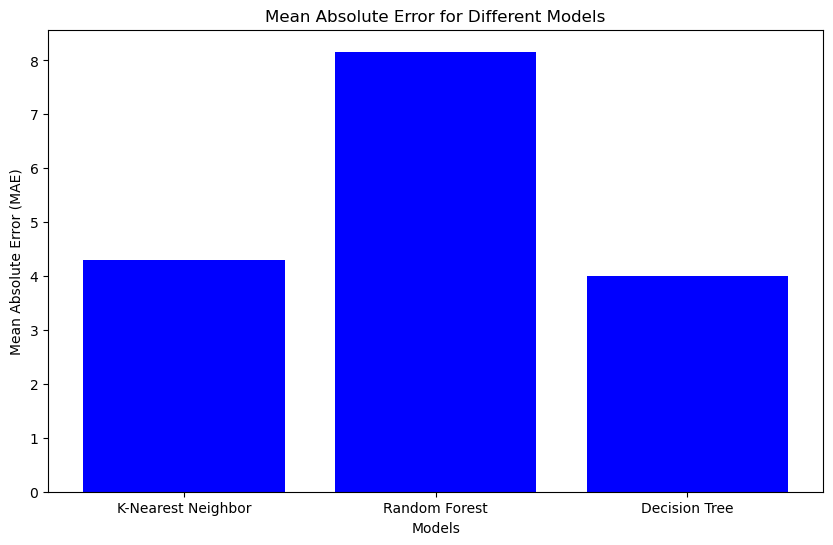

In [27]:
mae_values = [kn_mae ,dt_mae,rf_mae ]
plt.figure(figsize=(10, 6))
plt.bar(models, mae_values, color='blue')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Mean Absolute Error for Different Models')
plt.show()


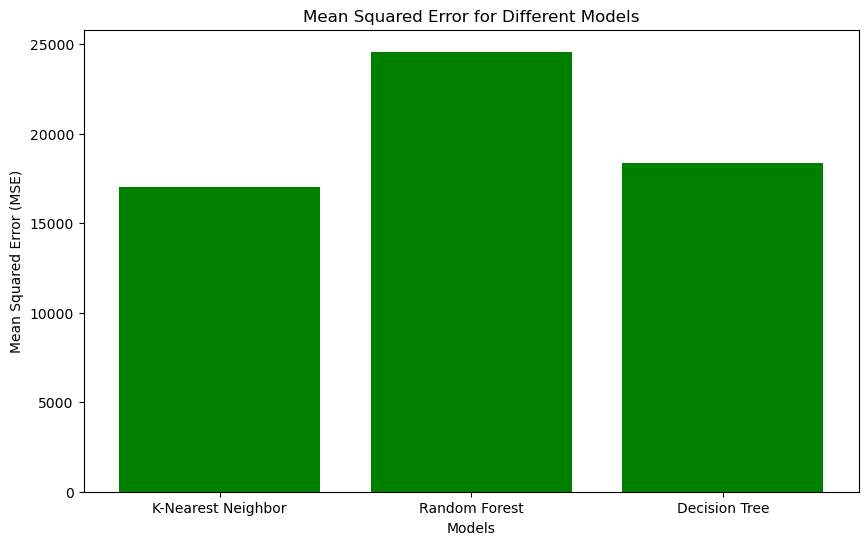

In [28]:
mse_values = [kn_mse ,dt_mse,rf_mse ]
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color='green')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error for Different Models')
plt.show()

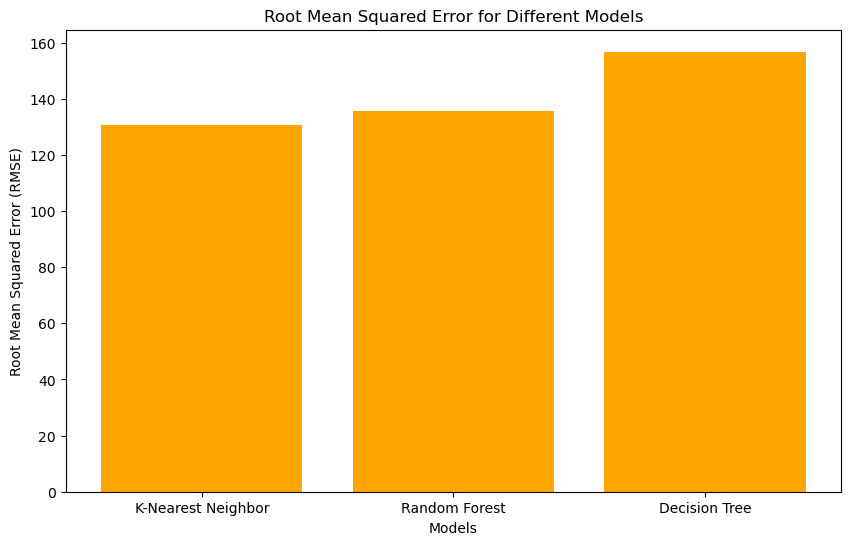

In [29]:
rmse_values = [kn_rmse, rf_rmse, dt_rmse]
# Plot RMSE
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values, color='orange')
plt.xlabel('Models')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Root Mean Squared Error for Different Models')
plt.show()


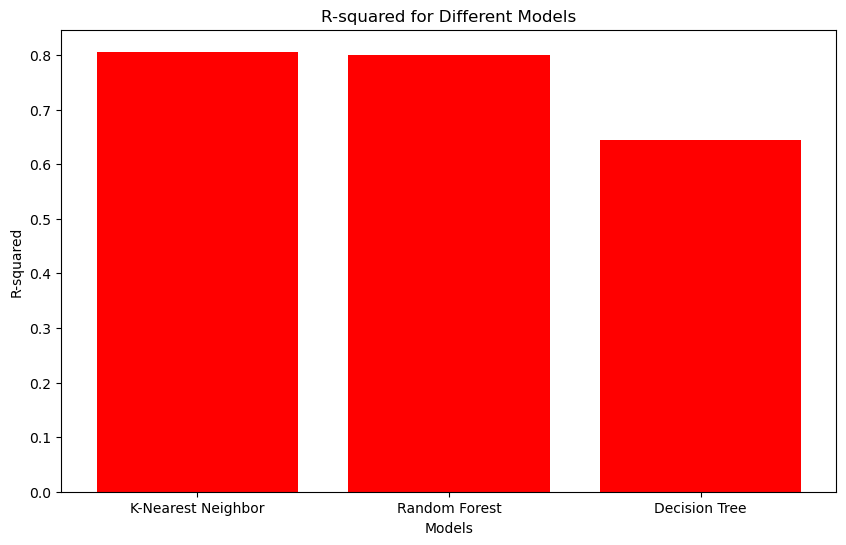

In [30]:
r_squared_values = [kn_r2, rf_r2,dt_r2]

plt.figure(figsize=(10, 6))
plt.bar(models, r_squared_values, color='red')
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('R-squared for Different Models')
plt.show()